In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
from sklearn.preprocessing import MinMaxScaler

In [37]:
df = pd.read_csv("output/score.csv")
df

,1,2,3,4,...,60,61,62,63
0,0.375,0.250,0.750,0.000,...,0.375,0.125,0.625,0.125
1,0.333,0.444,0.111,0.444,...,0.222,0.444,0.444,0.333
2,0.333,0.333,0.417,0.167,...,0.167,0.167,0.167,0.083
3,0.167,0.250,0.167,0.333,...,0.250,0.250,0.167,0.250
4,0.154,0.308,0.154,0.154,...,0.154,0.385,0.231,0.154
...,...,...,...,...,...,...,...,...,...
96,0.000,0.000,0.167,0.167,...,0.167,0.167,0.000,0.167
97,0.500,0.500,0.500,0.500,...,1.000,0.500,0.500,0.500
98,0.308,0.385,0.077,0.154,...,0.308,0.385,0.231,0.462
99,0.154,0.077,0.000,0.077,...,0.154,0.077,0.231,0.231


In [38]:
df2 = pd.read_csv("output/score_2.csv")
pd.set_option('display.max_columns', 13)
df2

,1,2,3,4,5,6,...,58,59,60,61,62,63
0,0.375,0.375,0.375,0.375,0.375,0.375,...,0.375,0.375,0.375,0.375,0.375,0.375
1,0.444,0.444,0.444,0.444,0.444,0.444,...,0.444,0.444,0.444,0.444,0.444,0.444
2,0.333,0.333,0.333,0.333,0.333,0.333,...,0.333,0.333,0.333,0.333,0.333,0.333
3,0.250,0.250,0.250,0.250,0.250,0.250,...,0.250,0.250,0.250,0.250,0.250,0.250
4,0.154,0.154,0.154,0.154,0.154,0.154,...,0.154,0.154,0.154,0.154,0.154,0.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000
97,0.500,0.500,0.500,0.500,0.500,0.500,...,0.500,0.500,0.500,0.500,0.500,0.500
98,0.154,0.154,0.154,0.154,0.154,0.154,...,0.154,0.154,0.154,0.154,0.154,0.154
99,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000


In [39]:
print(df.values)
print(np.median(df.values))
print(np.mean(df.values))

[[0.375 0.25  0.75  ... 0.125 0.625 0.125]
 [0.333 0.444 0.111 ... 0.444 0.444 0.333]
 [0.333 0.333 0.417 ... 0.167 0.167 0.083]
 ...
 [0.308 0.385 0.077 ... 0.385 0.231 0.462]
 [0.154 0.077 0.    ... 0.077 0.231 0.231]
 [0.25  0.167 0.333 ... 0.25  0.25  0.333]]
0.231
0.222010215307245


In [40]:
def scatterplot(x_data, y_data, title, x_label="electrode_number", y_label="score", color = "g", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots(figsize=(15,7))

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 15, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.savefig("graphics/" + title + '.jpg')

In [41]:
x_data = [[str(j) for j in range(1, df.values.shape[1] + 1)] for i in range(1, 102)]
y_data = df.values
#x_data, y_data

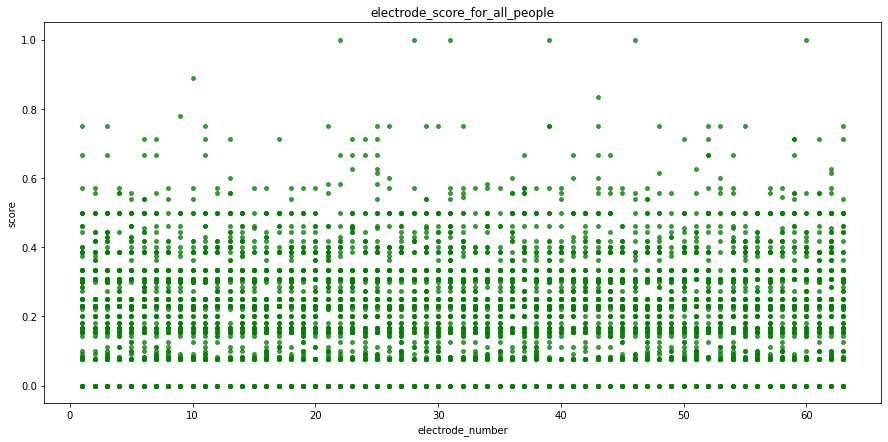

In [42]:
scatterplot(x_data, y_data, "electrode_score_for_all_people")

In [43]:
df.values.mean(), np.median(df.values)

(0.222010215307245, 0.231)

In [83]:
def barplot(title, x_label="electrode number", y_label="mean score"):
    
    # Create the plot object
    fig, ax = plt.subplots(figsize=(15, 7))
    
    # Label the axes and provide a title
    #ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    mean_score = [df[col].mean() for col in df]
    
    i = 1
    for col in df:
        ax.bar(str(i), df[col].mean(), width=1, color='b', edgecolor='k', alpha=0.75)
        ax.errorbar(i-1, df[col].mean(), yerr=np.std(mean_score), color = 'r', ls = 'none', lw = 2, capthick = 2)
        i += 1
    plt.legend(['mean score', 'standard deviation'])
    plt.savefig("graphics/" + title + '.jpg')
    plt.show()

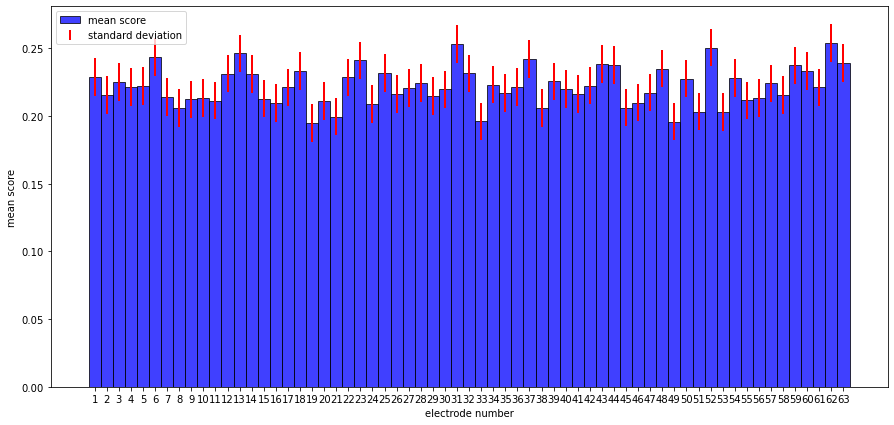

In [84]:
barplot("Mean score of the electrodes")

In [22]:
df = pd.read_csv("data/with_avg_vals.csv")
pd.set_option('display.max_columns', 9)
uniq_vals = np.unique(df["name"].values)
df["name"] == df["name"].apply(lambda x: x[:11])
df1 = df.loc[df.name == uniq_vals[2]].reset_index(drop=True)
df1

,1_1,1_2,1_3,1_4,...,63_5,63_6,name,task
0,1.492692e-12,1.238635e-12,1.910639e-13,1.391849e-13,...,9.200580e-13,4.572670e-13,chcon_s_102,0
1,7.049684e-13,1.342876e-12,2.752966e-13,4.697597e-13,...,2.386464e-13,1.629742e-13,chcon_s_102,0
2,6.013291e-13,1.099664e-12,3.951522e-13,2.993900e-13,...,5.496934e-13,3.740934e-13,chcon_s_102,0
3,1.983854e-13,4.378199e-13,5.245689e-13,1.822007e-13,...,1.099374e-12,2.168006e-13,chcon_s_102,0
4,1.369758e-12,4.479227e-13,7.826958e-13,1.221268e-12,...,9.774529e-13,1.985916e-13,chcon_s_102,0
...,...,...,...,...,...,...,...,...,...
110,3.250180e-12,6.762252e-13,8.742837e-13,2.789760e-13,...,9.660850e-13,8.965652e-13,chcon_s_102,3
111,3.005538e-12,7.622600e-13,3.951518e-13,5.211876e-13,...,3.029778e-13,1.062439e-12,chcon_s_102,3
112,2.683009e-12,2.795308e-12,2.816187e-13,7.334988e-13,...,7.614454e-13,1.369562e-12,chcon_s_102,3
113,7.558109e-12,3.800672e-13,7.696249e-13,7.126857e-13,...,4.882033e-13,7.098585e-14,chcon_s_102,3


In [23]:
df2 = pd.DataFrame(df[["1_1", "1_2", "1_3", "1_4", "1_5", "1_6", "task", "name"]]).loc[df.name == uniq_vals[2]]
df2["name"] = df2["name"].apply(lambda x: x[:11])
df3 = df2.reset_index(drop=True)
df3

,1_1,1_2,1_3,1_4,1_5,1_6,task,name
0,1.492692e-12,1.238635e-12,1.910639e-13,1.391849e-13,2.909224e-13,1.895839e-13,0,chcon_s_102
1,7.049684e-13,1.342876e-12,2.752966e-13,4.697597e-13,1.565714e-13,2.686569e-13,0,chcon_s_102
2,6.013291e-13,1.099664e-12,3.951522e-13,2.993900e-13,3.229311e-13,4.628919e-13,0,chcon_s_102
3,1.983854e-13,4.378199e-13,5.245689e-13,1.822007e-13,3.682875e-12,6.127147e-13,0,chcon_s_102
4,1.369758e-12,4.479227e-13,7.826958e-13,1.221268e-12,5.726069e-13,3.406408e-13,0,chcon_s_102
...,...,...,...,...,...,...,...,...
110,3.250180e-12,6.762252e-13,8.742837e-13,2.789760e-13,8.287411e-13,1.660736e-13,3,chcon_s_102
111,3.005538e-12,7.622600e-13,3.951518e-13,5.211876e-13,1.039477e-12,1.069287e-12,3,chcon_s_102
112,2.683009e-12,2.795308e-12,2.816187e-13,7.334988e-13,6.672073e-13,1.255715e-13,3,chcon_s_102
113,7.558109e-12,3.800672e-13,7.696249e-13,7.126857e-13,4.592769e-13,3.354001e-13,3,chcon_s_102


In [30]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
df_scale = pd.DataFrame(scaler.fit_transform(df3.drop(["name", "task"], axis=1)), columns=["1_1", "1_2", "1_3", "1_4", "1_5", "1_6"])
df_scale["task"], df_scale["name"] = df3.task, df3.name
df_scale

,1_1,1_2,1_3,1_4,1_5,1_6,task,name
0,0.012118,0.238420,0.105437,0.043330,0.060459,0.037924,0,chcon_s_102
1,0.004845,0.260210,0.169407,0.190699,0.023245,0.056127,0,chcon_s_102
2,0.003889,0.209371,0.260431,0.114749,0.069325,0.100841,0,chcon_s_102
3,0.000169,0.071025,0.358716,0.062507,1.000000,0.135331,0,chcon_s_102
4,0.010983,0.073137,0.554749,0.525719,0.138483,0.072698,0,chcon_s_102
...,...,...,...,...,...,...,...,...
110,0.028343,0.120859,0.624305,0.105649,0.209430,0.032512,3,chcon_s_102
111,0.026084,0.138843,0.260431,0.213626,0.267802,0.240435,3,chcon_s_102
112,0.023107,0.563813,0.174209,0.308273,0.164686,0.023188,3,chcon_s_102
113,0.068113,0.058953,0.544822,0.298995,0.107091,0.071492,3,chcon_s_102


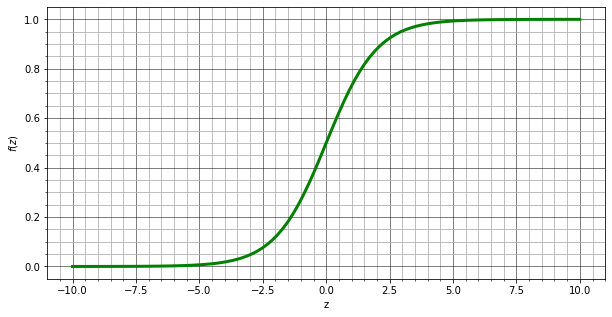

In [32]:
# импортируем модули
import numpy as np
import matplotlib.pyplot as plt
# функция
y = lambda x: 1 / (1 + np.exp(-x))
# создаём рисунок с координатную плоскость
fig, ax = plt.subplots(figsize=(10, 5))
# создаём область, в которой будет
# - отображаться график
x = np.linspace(-10, 10, 100)
# значения x, которые будут отображены
# количество элементов в созданном массиве
# - качество прорисовки графика 
# рисуем график

plt.plot(x, y(x), color='g', linewidth=3)
ax.minorticks_on()
ax.grid(which='major', color='k', linewidth=0.5)
ax.grid(which='minor')
ax.set_xlabel("z")
ax.set_ylabel(r"$f(z)$")
# показываем график
plt.savefig("graphics/sigmoid.pdf")
plt.show()

In [38]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression

def logit_pvalue(model, x):
    p1 = model.predict_proba(x)
    n1 = len(p1)
    m1 = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    answ = np.zeros((m1, m1))
    for i in range(n1):
        answ = answ \
            + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) \
            * p1[i,1] * p1[i, 0]
    vcov = np.linalg.inv(np.matrix(answ))
    se = np.sqrt(np.diag(vcov))
    t1 =  coefs/se  
    p1 = (1 - norm.cdf(abs(t1))) * 2
    return p1

x = np.arange(10)[:, np.newaxis]
y = np.array([0,0,0,1,0,0,1,1,1,1])
model = LogisticRegression(C=1e30).fit(x, y)
print(logit_pvalue(model, x))

import statsmodels.tools as sm
import statsmodels.api as sd
sd_model = sd.Logit(y, sm.add_constant(x)).fit(disp=0)
print(sd_model.pvalues)
sd_model.summary()

[0.11413069 0.08780009]
[0.11413093 0.08779979]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 Jun 2022   Pseudo R-squ.:                  0.4856
Time:                        22:47:48   Log-Likelihood:                -3.5656
converged:                       True   LL-Null:                       -6.9315
Covariance Type:            nonrobust   LLR p-value:                  0.009472
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9587      2.506     -1.580      0.114      -8.870       0.952
x1             0.8797      0.515      1.707      0.088      -0.130       1.890
==============================================================================
"""